--- 데이터 요약 ---
  success        data__chip data__vendor data__processNode  data__dieSizeMm2  \
0    True  NVIDIA H100 SXM5       NVIDIA           TSMC 4N             814.0   
1     NaN  NVIDIA H100 PCIe       NVIDIA           TSMC 4N             814.0   
2     NaN  NVIDIA H200 SXM5       NVIDIA           TSMC 4N             814.0   
3     NaN       NVIDIA B100       NVIDIA          TSMC 4NP            1600.0   
4     NaN       NVIDIA B200       NVIDIA          TSMC 4NP            1600.0   

  data__memoryType  data__memoryCapacityGb  data__memoryBandwidthTbS  \
0             HBM3                      80                      3.35   
1            HBM2e                      80                      2.00   
2            HBM3e                     141                      4.80   
3            HBM3e                     192                      8.00   
4            HBM3e                     192                      8.00   

   data__fp8TflopsSparse  data__bf16TflopsDense  ...  \
0              

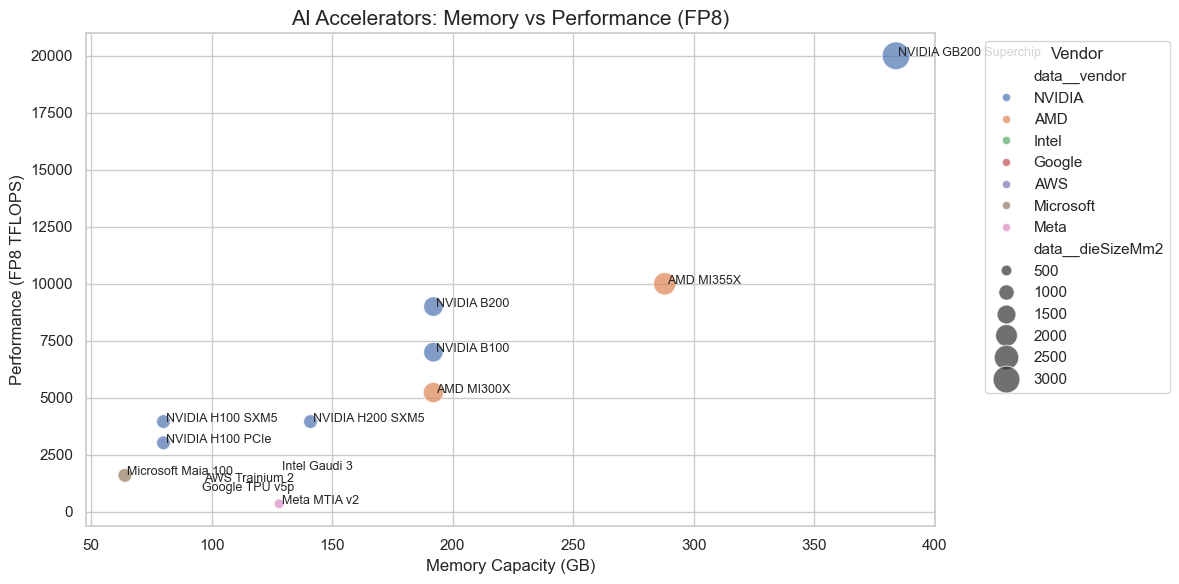


--- 제조사별 평균 성능 ---
data__vendor
NVIDIA       7823.666667
AMD          7615.000000
Intel        1835.000000
Microsoft    1600.000000
AWS          1300.000000
Google        918.000000
Meta          354.000000
Name: data__fp8TflopsSparse, dtype: float64


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. CSV 파일 불러오기
# 저장하신 파일명으로 이름을 바꿔주세요.
file_name = 'result_v1.csv' 
df = pd.read_csv(file_name)

# 2. 데이터 확인 (상위 5개)
print("--- 데이터 요약 ---")
print(df.head())

# 3. 그래프 그리기 설정 (한글 깨짐 방지 설정이 필요할 수 있습니다)
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

# 4. 시각화: 메모리 용량 vs 성능(FP8 TFLOPS) 산점도
# 'memoryCapacityGb'와 'fp8TflopsSparse' 컬럼명을 사용합니다.
plt.title('AI Accelerators: Memory vs Performance (FP8)', fontsize=15)
scatter = sns.scatterplot(
    data=df, 
    x='data__memoryCapacityGb', 
    y='data__fp8TflopsSparse', 
    hue='data__vendor',     # 제조사별로 색상 구분
    size='data__dieSizeMm2', # 칩 크기에 따라 점 크기 조절
    sizes=(50, 400),
    alpha=0.7
)

# 점 옆에 제품명(chip) 표시하기
for i in range(df.shape[0]):
    plt.text(df.data__memoryCapacityGb[i]+1, df.data__fp8TflopsSparse[i], df.data__chip[i], fontsize=9)

plt.xlabel('Memory Capacity (GB)')
plt.ylabel('Performance (FP8 TFLOPS)')
plt.legend(title='Vendor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# 그래프 저장 및 출력
plt.savefig('ai_accelerator_analysis.png')
plt.show()

# 5. 간단한 통계 분석
print("\n--- 제조사별 평균 성능 ---")
summary = df.groupby('data__vendor')['data__fp8TflopsSparse'].mean().sort_values(ascending=False)
print(summary)
